[Run on colab](https://colab.research.google.com/drive/1PIMdK3Je8TzQTyE4tleEJNNK_YUnAHT6?usp=sharing)

In [5]:
# mount my gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
# @title Configuration class

from dataclasses import dataclass

@dataclass
class Config:

    # path root dir
    ROOT_DIR = '/content'

    # Path to workuing dir
    WORKING_DIR = '/content/GroundingDINO-Re-implementation/refer'

    # path gdrive folder
    DATSET_DIR_GDRIVE = '/content/gdrive/MyDrive/AI_Robotics/y1-s2-computer-vision/grounding-dino-datasets'
    FILE_DATASET_DIR_GDRIVE = '/content/gdrive/MyDrive/AI_Robotics/y1-s2-computer-vision/grounding-dino-datasets/data/images/mscoco/images'
    REF_DATA_GDRIVE = '/content/gdrive/MyDrive/AI_Robotics/y1-s2-computer-vision/grounding-dino-datasets/data'

    # path to the github repo
    REPO_DIR = 'https://github.com/Andrea-Caminiti/GroundingDINO-Re-implementation.git'

config = Config()


In [1]:
# !rm -rf /content/GroundingDINO-Re-implementation

In [3]:
# Clone the refcoco_data_prep branch from the git repository
!git clone -b refcoco_data_prep https://github.com/Andrea-Caminiti/GroundingDINO-Re-implementation.git
# !rm -rf /content/GroundingDINO-Re-implementation

# !git clone -b python3 https://github.com/lichengunc/refer.git

Cloning into 'GroundingDINO-Re-implementation'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 98 (delta 22), reused 38 (delta 11), pack-reused 47
Receiving objects: 100% (98/98), 74.31 MiB | 33.59 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [39]:
# exit()

In [4]:
%matplotlib inline
import os
import sys
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt



In [5]:
# Without this, you are gonna encounter an error wit 'make'
sys.path.append('/content/GroundingDINO-Re-implementation')
sys.path.append('/content/GroundingDINO-Re-implementation/refer')
sys.path = list(set(sys.path))
print(list(sys.path))
os.getcwd()
# os.chdir('../')

['', '/env/python', '/usr/lib/python3.10/lib-dynload', '/content/GroundingDINO-Re-implementation', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/GroundingDINO-Re-implementation/refer', '/content', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages']


'/content'

In [7]:
# Remove the sample_data folder
!rm -rf '/content/sample_data'

# !rm -rf /content/refer
# os.chdir('../')

os.chdir(config.WORKING_DIR)
print(f"Current working directory: {os.getcwd()}")

print(f"List of files/folders in current working directory: {os.listdir(config.WORKING_DIR)}")

Current working directory: /content/GroundingDINO-Re-implementation/refer
List of files/folders in current working directory: ['pyReferDemo.ipynb', 'data', 'LICENSE', 'pyEvalDemo.ipynb', 'evaluation', 'README.md', '.gitignore', 'external', 'test', 'setup.py', 'Makefile', 'refer.py']


In [8]:
# Run "make" before using the code. It will generate _mask.c and _mask.so in external/ folder.
# These mask-related codes are copied from mscoco API.
# !python setup.py clean --all

# Need to be in the refer folder -> os.chdir('./GroundingDINO-Re-implementation/refer')
!make

# install pycocotools/mask locally
# copy from https://github.com/pdollar/coco.git
python setup.py build_ext --inplace
Compiling external/_mask.pyx because it changed.
[1/1] Cythonizing external/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/GroundingDINO-Re-implementation/refer/external/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
external/maskApi.c: In function ‘rleDecode’:
external/maskApi.c:46:7: warning: this ‘for’ clause does not guard... []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmisleading-indentation-Wmisleading-indentation]8;;]
   46 |       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
      |       ^~~
external/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   46 |       for( k=0; k<R[

In [9]:
# import the refer module

# import the refer module
from refer import REFER


In [28]:
# Download the dataset, not the images. See below for the images.

# change to the working directory
os.chdir(config.DATSET_DIR_GDRIVE)

# Create the data directory
!mkdir -p data

# Download the datasets
!wget -q -P data http://bvisionweb1.cs.unc.edu/licheng/referit/data/refclef.zip
!wget -q -P data http://bvisionweb1.cs.unc.edu/licheng/referit/data/refcoco.zip
!wget -q -P data http://bvisionweb1.cs.unc.edu/licheng/referit/data/refcoco+.zip
!wget -q -P data http://bvisionweb1.cs.unc.edu/licheng/referit/data/refcocog.zip

# Extract the datasets
!unzip data/refclef.zip -d data
!unzip data/refcoco.zip -d data
!unzip data/refcoco+.zip -d data
!unzip data/refcocog.zip -d data

# Remove the zip files
!rm data/refclef.zip
!rm data/refcoco.zip
!rm data/refcoco+.zip
!rm data/refcocog.zip

# Change back to the working directory
os.chdir(config.WORKING_DIR)

Archive:  data/refclef.zip
   creating: data/refclef/
  inflating: data/refclef/refs(berkeley).p  
  inflating: data/refclef/instances.json  
  inflating: data/refclef/refs(unc).p  
Archive:  data/refcoco.zip
  inflating: data/refcoco/instances.json  
  inflating: data/refcoco/refs(google).p  
  inflating: data/refcoco/refs(unc).p  
Archive:  data/refcoco+.zip
  inflating: data/refcoco+/instances.json  
  inflating: data/refcoco+/refs(unc).p  
Archive:  data/refcocog.zip
   creating: data/refcocog/
  inflating: data/refcocog/refs(google).p  
  inflating: data/refcocog/refs(umd).p  
  inflating: data/refcocog/instances.json  


Prepare the images:
- For RefCOCO, RefCOCO+, and RefCOCOg, you'll need the COCO images.
- For RefCLEF, you need to download and extract the saiapr_tc-12 dataset.

In [ ]:
# os.getcwd()
# !mkdir -p data/images/mscoco/images
# list(os.listdir('data/images/mscoco'))
# os.path.exists("data/images/mscoco/images")

['images', 'val2014', 'train2014']

In [ ]:
# os.chdir(ROOT_DIR)
# !mkdir -p !mkdir -p data/images/mscoco/images
# !mv data/images/mscoco/train2014 data/images/mscoco/images/train2014
# !mv data/images/mscoco/val2014 data/images/mscoco/images/val2014
# !rm /content/data/images/mscoco/images/train2014
# !rm /content/data/images/mscoco/images/val2014

# copy instead of move
# !cp -r /content/data/images/mscoco/train2014 /content/data/images/mscoco/images/train2014
# !cp -r /content/data/images/mscoco/val2014 /content/data/images/mscoco/images/val2014

In [ ]:
# Download the COCO 2014 train and val images

# change to the working directory
os.chdir(config.DATSET_DIR_GDRIVE)

# Create the mscoco directory inside the images directory to move the COCO 2014 train and val images
!mkdir -p data/images/mscoco/images

# Download the COCO 2014 train and val images
!wget -P data/images http://images.cocodataset.org/zips/train2014.zip
!wget -P data/images http://images.cocodataset.org/zips/val2014.zip

# Extract the images
!unzip data/images/train2014.zip -d data/images/mscoco/images
!unzip data/images/val2014.zip -d data/images/mscoco/images

# Remove the zip files
!rm data/images/train2014.zip
!rm data/images/val2014.zip

# Change back to the working directory
os.chdir(config.WORKING_DIR)

In [10]:
LEN_TRAIN_COCO = len(os.listdir(config.FILE_DATASET_DIR_GDRIVE + '/train2014'))
LEN_VAL_COCO = len(os.listdir(config.FILE_DATASET_DIR_GDRIVE + '/val2014'))

print(LEN_TRAIN_COCO, LEN_VAL_COCO)

82783 40504


In [ ]:
# TODO: Download the RefCLEF image subset

# change to the working directory
os.chdir(ROOT_DIR)

# Create the directory for saiapr_tc-12 images
!mkdir -p data/images/saiapr_tc-12

# Download the RefCLEF image subset
!wget -P data/images/saiapr_tc-12 http://bvisionweb1.cs.unc.edu/licheng/referit/data/images/saiapr_tc-12.zip

# Extract the images
!unzip data/images/saiapr_tc-12.zip -d data/images/saiapr_tc-12

# Remove the zip file
!rm data/images/saiapr_tc-12.zip

# Change back to the working directory
os.chdir(WORKING_DIR)


--2024-05-18 14:27:01--  http://bvisionweb1.cs.unc.edu/licheng/referit/data/images/saiapr_tc-12.zip
Resolving bvisionweb1.cs.unc.edu (bvisionweb1.cs.unc.edu)... 152.2.123.122
Connecting to bvisionweb1.cs.unc.edu (bvisionweb1.cs.unc.edu)|152.2.123.122|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bvisionweb1.cs.unc.edu/licheng/referit/data/images/saiapr_tc-12.zip [following]
--2024-05-18 14:27:03--  https://bvisionweb1.cs.unc.edu/licheng/referit/data/images/saiapr_tc-12.zip
Connecting to bvisionweb1.cs.unc.edu (bvisionweb1.cs.unc.edu)|152.2.123.122|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-05-18 14:27:03 ERROR 403: Forbidden.

unzip:  cannot find or open data/images/saiapr_tc-12.zip, data/images/saiapr_tc-12.zip.zip or data/images/saiapr_tc-12.zip.ZIP.
rm: cannot remove 'data/images/saiapr_tc-12.zip': No such file or directory


This is how the dataset folder looks like:

data/  
- ├── refclef/  
- ├── refcoco/  
- ├── refcoco+/  
- ├── refcocog/  
- └── images/  
    - ├── mscoco/  
    - │   ├── train2014/  
    - │   └── val2014/  
    - └── saiapr_tc-12/  


In [11]:
# Load Refer Dataset
data_root = '/content/data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root=config.DATSET_DIR_GDRIVE + '/data', dataset=dataset, splitBy=splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=32.69s)


In [12]:
# Stats about the Dataset

# print stats about the given dataset
print('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.

for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [refcoco_unc] contains: 
142210 expressions for 50000 refs in 19994 images.

Among them:
42404 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


ref_id [17574] (ann_id [272336])
1. far left chicken half
2. left brown hen
3. chicken on left of screen only partially visible
[7.83, 385.72, 40.6, 412.42, 67.31, 403.93, 70.95, 393.0, 77.02, 378.43, 84.31, 368.72, 91.59, 369.93, 97.66, 400.28, 117.08, 440.34, 111.01, 488.9, 100.09, 509.54, 95.23, 555.67, 90.38, 538.68, 79.45, 556.89, 72.17, 550.82, 61.24, 558.1, 46.67, 558.1, 53.96, 539.89, 55.17, 525.32, 36.96, 510.75, 1.76, 490.12, 1.76, 384.5]


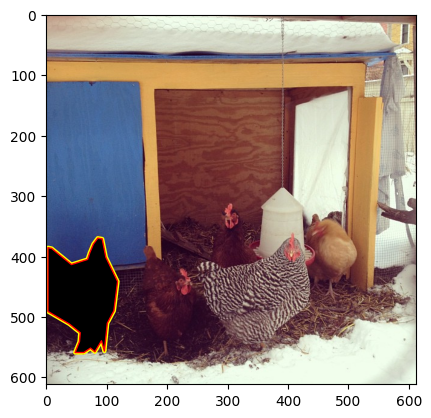

In [15]:
# Show Refered Object and its Expressions

# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. far left chicken half
2. left brown hen
3. chicken on left of screen only partially visible


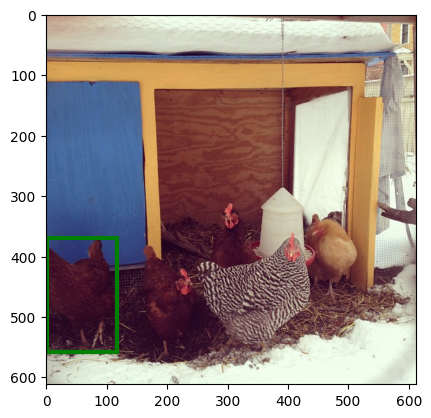

In [16]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [18]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[50000]: far left chicken half
sent_id[50001]: left brown hen
sent_id[50002]: chicken on left of screen only partially visible


## Inspect Data

In [25]:
# !head $config.REF_DATA_GDRIVE'/refcoco/instances.json'

In [27]:
import os

# Check the number of available CPU cores
num_cores = os.cpu_count()
print(f"Number of CPU cores available: {num_cores}")


Number of CPU cores available: 2


## Backbone Feature Extractors

In [ ]:

!pip install -q transformers timm


In [28]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
import timm

class TextBackbone(nn.Module):
    def __init__(self, pretrained_model_name='bert-base-uncased'):
        super(TextBackbone, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)

    def forward(self, texts):
        encoded_inputs = self.tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
        input_ids = encoded_inputs['input_ids']
        attention_mask = encoded_inputs['attention_mask']
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # [CLS] token representation
        return pooled_output

class ImageBackbone(nn.Module):
    def __init__(self, pretrained_model_name='swin_base_patch4_window7_224'):
        super(ImageBackbone, self).__init__()
        self.swin = timm.create_model(pretrained_model_name, pretrained=True)
        self.swin.reset_classifier(0)  # Remove the original classifier

    def forward(self, images):
        features = self.swin(images)
        return features

class MultiModalFeatureExtractor(nn.Module):
    def __init__(self, text_model_name='bert-base-uncased', image_model_name='swin_base_patch4_window7_224'):
        super(MultiModalFeatureExtractor, self).__init__()
        self.text_backbone = TextBackbone(pretrained_model_name=text_model_name)
        self.image_backbone = ImageBackbone(pretrained_model_name=image_model_name)

    def forward(self, texts, images):
        text_features = self.text_backbone(texts)
        image_features = self.image_backbone(images)
        return text_features, image_features


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Text features shape: torch.Size([2, 768])
Image features shape: torch.Size([2, 1024])


In [29]:
model = MultiModalFeatureExtractor()

# Example input
texts = ["This is an example sentence.", "Another example sentence."]
images = torch.randn(2, 3, 224, 224)  # Batch of 2 images with shape (3, 224, 224)

text_features, image_features = model(texts, images)
print("Text features shape:", text_features.shape)
print("Image features shape:", image_features.shape)

Text features shape: torch.Size([2, 768])
Image features shape: torch.Size([2, 1024])


In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms

# Define the list of image filenames
image_filenames = [
    "COCO_train2014_000000270070.jpg",
    "COCO_train2014_000000101772.jpg",
    "COCO_train2014_000000359320.jpg",
    "COCO_train2014_000000486482.jpg",
    "COCO_train2014_000000116155.jpg",
    "COCO_train2014_000000082143.jpg",
    "COCO_train2014_000000242307.jpg",
    "COCO_train2014_000000510484.jpg",
    "COCO_train2014_000000339597.jpg",
    "COCO_train2014_000000366396.jpg",
    "COCO_train2014_000000363942.jpg"
]

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Function to load and transform a single image
def load_and_transform_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format
    return transform(image)

# Load and transform all images
image_tensors = []
for idx, image_filename in enumerate(os.listdir(
    os.path.join(config.FILE_DATASET_DIR_GDRIVE, 'train2014')
    ) ):
    image_filename = os.path.join(config.FILE_DATASET_DIR_GDRIVE, 'train2014', image_filename)
    image_tensor = load_and_transform_image(image_filename)
    image_tensors.append(image_tensor)
    print(idx, image_filename)

    if idx == 10:
        break

# Stack all image tensors into a single tensor
input_tensor = torch.stack(image_tensors)

# Check the shape of the resulting tensor
print(f"Input tensor shape: {input_tensor.shape}")


In [43]:
# generate texts of size batch_size == 11
texts = [
    "This is an example sentence.",
    "Another example sentence.",
    "Yet another example sentence.",
    "This another test",
    "This is an example sentence.",
    "Another example sentence.",
    "Yet another example sentence.",
    "This another test",
    "This is an example sentence.",
    "Another example sentence.",
    "Yet another example sentence.",
    "This another test"
]

input_tensor.shape

torch.Size([11, 3, 224, 224])

In [44]:
model

MultiModalFeatureExtractor(
  (text_backbone): TextBackbone(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=7

In [42]:
text_features, image_features = model(texts, input_tensor)
print("Text features shape:", text_features.shape)
print("Image features shape:", image_features.shape)

Text features shape: torch.Size([12, 768])
Image features shape: torch.Size([11, 1024])
